In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt #5matplotlibをimport
import seaborn as sns

In [2]:
dataset_train=pd.read_excel('oil.xlsx') #excle データをインポート

In [3]:
dataset_train

,t h,Req MΩ,Ceq pF,DFeq,Req pu,Ceq pu,Dfeq pu,ANN output
0,24,295.2,287.8,1.88,1.067,1.10,1.03,good
1,48,256.5,290.8,2.03,0.927,1.11,1.11,good
2,84,238.6,293.7,2.07,0.863,1.12,1.13,good
3,120,217.4,297.7,2.11,0.786,1.13,1.16,good
4,156,195.6,304.3,2.11,0.707,1.16,1.15,good
5,192,192.5,303.5,2.17,0.696,1.16,1.19,good
6,228,183.7,302.9,2.30,0.664,1.15,1.26,good
7,264,184.0,307.1,2.15,0.665,1.17,1.18,good
8,300,38.2,300.5,3.95,0.138,1.14,2.16,oil
9,336,23.7,306.9,3.97,0.086,1.17,2.17,oil


In [4]:
# import some data to play with
X = dataset_train.drop(['t h','Req MΩ','Ceq pF','DFeq','ANN output'],axis=1) 
y = dataset_train['t h'] 

In [5]:
X

,Req pu,Ceq pu,Dfeq pu
0,1.067,1.10,1.03
1,0.927,1.11,1.11
2,0.863,1.12,1.13
3,0.786,1.13,1.16
4,0.707,1.16,1.15
5,0.696,1.16,1.19
6,0.664,1.15,1.26
7,0.665,1.17,1.18
8,0.138,1.14,2.16
9,0.086,1.17,2.17


Original shape: (29, 3)
Reduced shape: (29, 2)


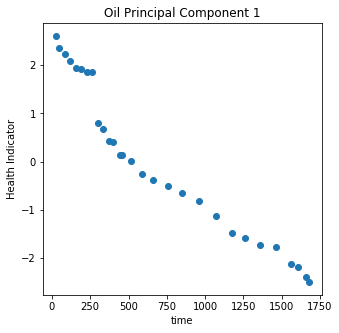

In [11]:
#平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

x_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

df_x_pca = pd.DataFrame(x_pca, columns=['Principal Component 1','Principal Component 2'])
df_x_pca["time"] = y
df_x_pca["ANN output"] = dataset_train['ANN output'] 

plt.figure(figsize=(5, 5)) #グラフのサイズ

plt.title('Oil Principal Component 1')
plt.xlabel('time')
plt.ylabel('Health Indicator')
plt.scatter(df_x_pca["time"], df_x_pca["Principal Component 1"])


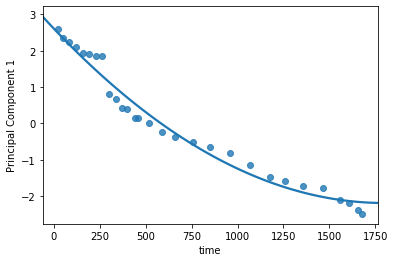

In [10]:
sns.regplot(data=df_x_pca, x='time', y='Principal Component 1', ci = 0, order = 2)

In [12]:
df_x_pca

,Principal Component 1,Principal Component 2,time,ANN output
0,2.606291,1.116823,24,good
1,2.353831,0.809090,48,good
2,2.236396,0.667013,84,good
3,2.095936,0.496538,120,good
4,1.939224,0.321197,156,good
5,1.911252,0.304696,192,good
6,1.854303,0.240916,228,good
7,1.853509,0.233607,264,good
8,0.801260,-0.794590,300,oil
9,0.681396,-0.901216,336,oil
